<a href="https://colab.research.google.com/github/Parthib-toppo/firstrepo/blob/main/Parthib_Toppo_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T001

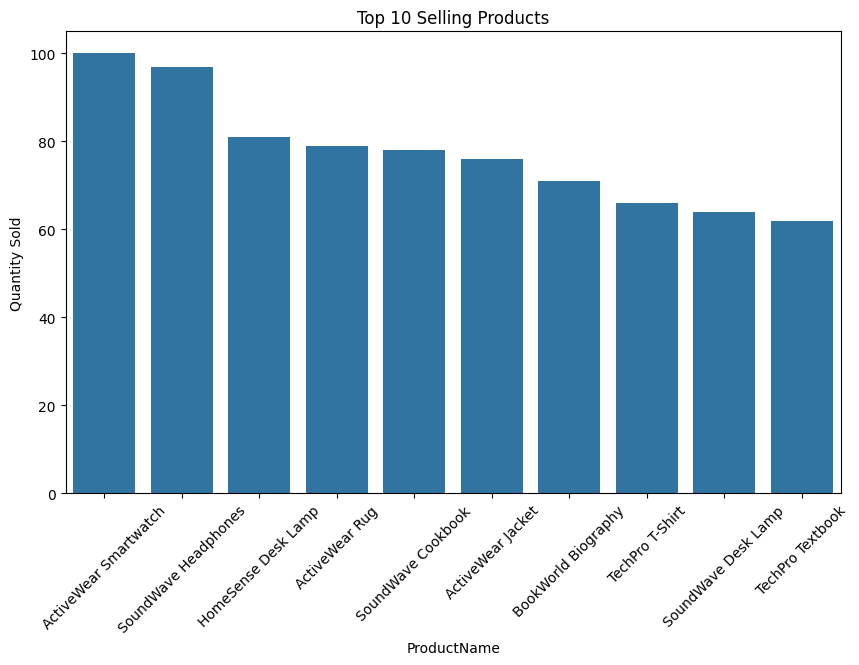

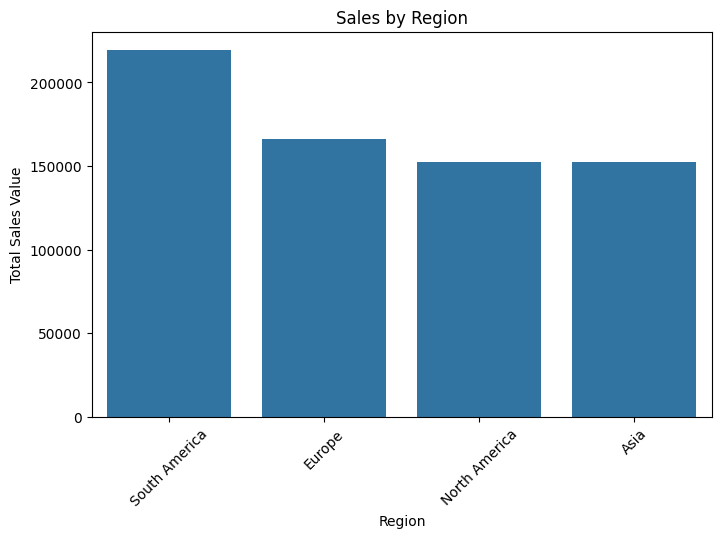


Signup Trends by Year:
 SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


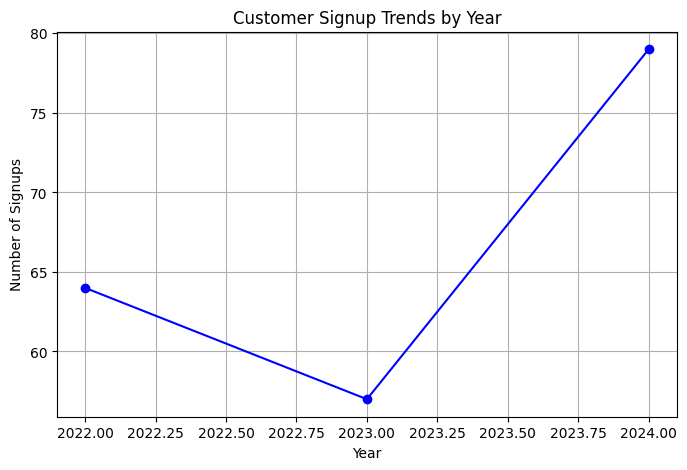


Most Purchased Product Categories:
              Quantity
Category             
Books             681
Home Decor        639
Electronics       627
Clothing          590


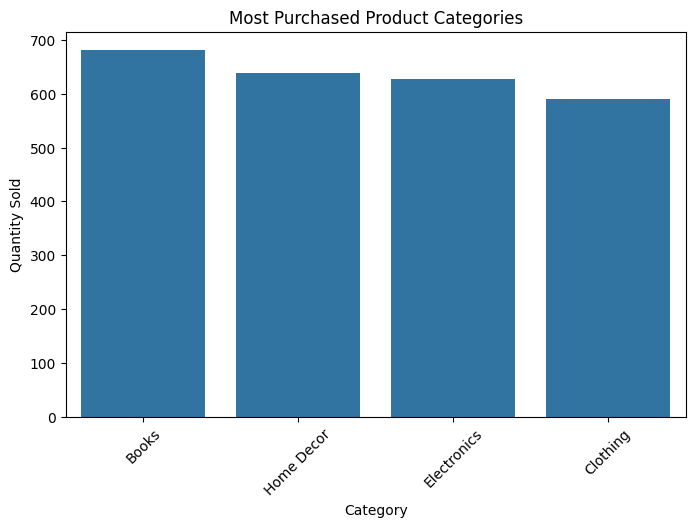


Average Transaction Value by Region:
                TotalValue
Region                   
South America  721.554474
Europe         710.489872
Asia           697.591606
North America  624.235246


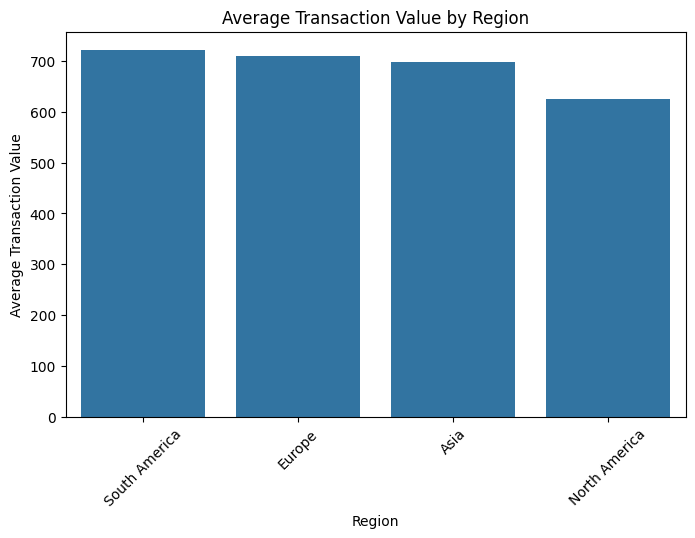


Top 10 Customers by Total Spending:
             TotalValue
CustomerID            
C0141         10673.87
C0054          8040.39
C0065          7663.70
C0156          7634.45
C0082          7572.91
C0188          7111.32
C0059          7073.28
C0028          6819.57
C0099          6715.72
C0165          6708.10


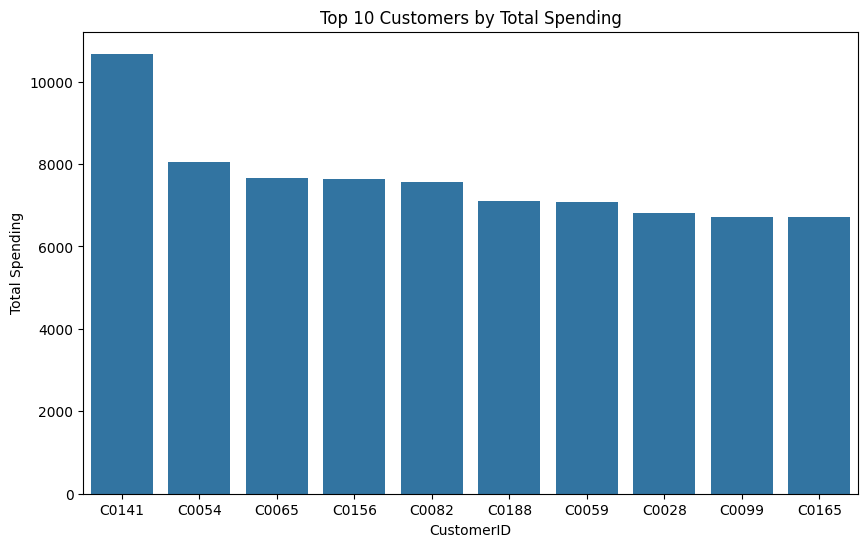

In [4]:
# Data Science Assignment: eCommerce Transactions Dataset

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Loading the datasets
customers_url = 'https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
products_url = 'https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transactions_url = 'https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

# Previewing the datasets
print("Customers Dataset:\n", customers.head(), "\n")
print("Products Dataset:\n", products.head(), "\n")
print("Transactions Dataset:\n", transactions.head(), "\n")

# Task 1: EDA and Business Insights
# Checking for missing values
print("Missing values in Customers:\n", customers.isnull().sum(), "\n")
print("Missing values in Products:\n", products.isnull().sum(), "\n")
print("Missing values in Transactions:\n", transactions.isnull().sum(), "\n")

# Basic statistics
print("\nBasic Statistics:\n")
print("Customers:\n", customers.describe(include='all'), "\n")
print("Products:\n", products.describe(include='all'), "\n")
print("Transactions:\n", transactions.describe(include='all'), "\n")

# Merging datasets for EDA
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

# Top-selling products
top_products = merged_data.groupby('ProductName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False).head(10)
print("Top 10 Selling Products:\n", top_products)

# Sales by region
region_sales = merged_data.groupby('Region').agg({'TotalValue': 'sum'}).sort_values(by='TotalValue', ascending=False)
print("\nSales by Region:\n", region_sales)

# Visualizing top-selling products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products['Quantity'])
plt.title("Top 10 Selling Products")
plt.xticks(rotation=45)
plt.ylabel("Quantity Sold")
plt.show()

# Visualizing sales by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales['TotalValue'])
plt.title("Sales by Region")
plt.xticks(rotation=45)
plt.ylabel("Total Sales Value")
plt.show()

# Additional insights:
# 1. Signup trends by year
customers['SignupYear'] = pd.to_datetime(customers['SignupDate']).dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
print("\nSignup Trends by Year:\n", signup_trends)
plt.figure(figsize=(8, 5))
plt.plot(signup_trends.index, signup_trends.values, marker='o', linestyle='-', color='b')
plt.title("Customer Signup Trends by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.grid(True)
plt.show()

# 2. Most purchased product categories
category_sales = merged_data.groupby('Category').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print("\nMost Purchased Product Categories:\n", category_sales)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales['Quantity'])
plt.title("Most Purchased Product Categories")
plt.xticks(rotation=45)
plt.ylabel("Quantity Sold")
plt.show()


# 3. Average transaction value by region
region_avg_transaction = merged_data.groupby('Region').agg({'TotalValue': 'mean'}).sort_values(by='TotalValue', ascending=False)
print("\nAverage Transaction Value by Region:\n", region_avg_transaction)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_avg_transaction.index, y=region_avg_transaction['TotalValue'])
plt.title("Average Transaction Value by Region")
plt.xticks(rotation=45)
plt.ylabel("Average Transaction Value")
plt.show()

# 4. Top customers by total spending
top_customers = merged_data.groupby('CustomerID').agg({'TotalValue': 'sum'}).sort_values(by='TotalValue', ascending=False).head(10)
print("\nTop 10 Customers by Total Spending:\n", top_customers)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers['TotalValue'])
plt.title("Top 10 Customers by Total Spending")
plt.ylabel("Total Spending")
plt.show()